<a href="https://colab.research.google.com/github/SnehhaPadmanabhan/Bertelsmann-AI-Challenge/blob/master/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('churn_modeling.csv')
print(data[:5])

   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]


In [3]:
list(data.head()) # data.colomns did not work

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [0]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

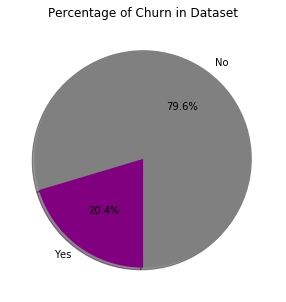

In [5]:
# Data to plot
sizes = data['Exited'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5 # Plot
labels = ['No', 'Yes']
plt.pie(sizes, labels = labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [0]:
data.drop(['RowNumber'], axis=1, inplace=True)
data.drop(['CustomerId'], axis=1, inplace=True)

In [0]:
data.drop(['Surname'], axis=1, inplace=True)

In [9]:
print(data.shape)
print(data.head(5))

(10000, 11)
   CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female  ...               1        101348.88       1
1          608     Spain  Female  ...               1        112542.58       0
2          502    France  Female  ...               0        113931.57       1
3          699    France  Female  ...               0         93826.63       0
4          850     Spain  Female  ...               1         79084.10       0

[5 rows x 11 columns]


In [10]:
one_hot_data = pd.concat([data, pd.get_dummies(data['Gender'], prefix = 'g')], axis = 1)
one_hot_data = one_hot_data.drop('Gender', axis = 1)
one_hot_data = pd.concat([one_hot_data, pd.get_dummies(data['Geography'], prefix = 'place')], axis = 1)
one_hot_data = one_hot_data.drop('Geography', axis = 1)
print(one_hot_data[:3])
list(one_hot_data.head())

   CreditScore  Age  Tenure  ...  place_France  place_Germany  place_Spain
0          619   42       2  ...             1              0            0
1          608   41       1  ...             0              0            1
2          502   42       8  ...             1              0            0

[3 rows x 14 columns]


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'g_Female',
 'g_Male',
 'place_France',
 'place_Germany',
 'place_Spain']

In [0]:
processed_data = one_hot_data[:]
processed_data['CreditScore'] = processed_data['CreditScore']/850
processed_data['Age'] = processed_data['Age']/92
processed_data['Tenure'] = processed_data['Tenure']/10
processed_data['Balance'] = processed_data['Balance']/250899
processed_data['NumOfProducts'] = processed_data['NumOfProducts']/4
processed_data['EstimatedSalary'] = processed_data['EstimatedSalary']/199993

In [12]:
processed_data[:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,g_Female,g_Male,place_France,place_Germany,place_Spain
0,0.728235,0.456522,0.2,0.000000,0.25,1,1,0.506762,1,1,0,1,0,0
1,0.715294,0.445652,0.1,0.334030,0.25,0,1,0.562733,0,1,0,0,0,1
2,0.590588,0.456522,0.8,0.636355,0.75,1,0,0.569678,1,1,0,1,0,0
3,0.822353,0.423913,0.1,0.000000,0.50,0,0,0.469150,0,1,0,1,0,0
4,1.000000,0.467391,0.2,0.500244,0.25,1,1,0.395434,0,1,0,0,0,1


In [13]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.8), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 8000
Number of testing samples is 2000
      CreditScore       Age  Tenure  ...  place_France  place_Germany  place_Spain
9070     0.550588  0.282609     0.1  ...             0              0            1
5927     0.678824  0.467391     0.3  ...             0              1            0
9560     0.807059  0.445652     0.5  ...             1              0            0
8261     0.788235  0.413043     0.7  ...             1              0            0
9585     0.817647  0.380435     0.7  ...             0              0            1
8085     0.934118  0.358696     0.0  ...             1              0            0
9823     0.648235  0.282609     0.2  ...             1              0            0
3093     0.737647  0.445652     0.5  ...             0              0            1
7528     0.680000  0.500000     0.5  ...             1              0            0
5133     0.563529  0.402174     0.6  ...             0              0            1

[10 rows x 14 col

In [14]:
features = train_data.drop('Exited', axis=1)
targets = train_data['Exited']
features_test = test_data.drop('Exited', axis=1)
targets_test = test_data['Exited']

print(features[:10])
print(targets[:10])

      CreditScore       Age  Tenure  ...  place_France  place_Germany  place_Spain
9070     0.550588  0.282609     0.1  ...             0              0            1
5927     0.678824  0.467391     0.3  ...             0              1            0
9560     0.807059  0.445652     0.5  ...             1              0            0
8261     0.788235  0.413043     0.7  ...             1              0            0
9585     0.817647  0.380435     0.7  ...             0              0            1
8085     0.934118  0.358696     0.0  ...             1              0            0
9823     0.648235  0.282609     0.2  ...             1              0            0
3093     0.737647  0.445652     0.5  ...             0              0            1
7528     0.680000  0.500000     0.5  ...             1              0            0
5133     0.563529  0.402174     0.6  ...             0              0            1

[10 rows x 13 columns]
9070    0
5927    1
9560    1
8261    0
9585    0
8085    0
982

In [16]:
list(features.head())

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'g_Female',
 'g_Male',
 'place_France',
 'place_Germany',
 'place_Spain']

In [0]:
import torch.nn.functional as F
import torch.nn as nn
class Network(nn.Module):
  def __init__(self, input_dim = 13, output_dim = 1):
    super(Network, self).__init__()
    self.fc1 = nn.Linear(input_dim, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 32)
    self.output_layer = nn.Linear(32,1)
    self.dropout = nn.Dropout(0.2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.output_layer(x)
    return nn.Sigmoid()(x)

In [22]:
model = Network(input_dim = 13, output_dim = 1)
print(model)

Network(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [0]:
import torch.optim as optim
epochs = 30
steps = 0
train_losses, test_losses = [], []
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
for e in range(epochs):
    running_loss = 0
    for features, targets in train_data:
        
        optimizer.zero_grad()
        features = features.view(features.shape[0], -1)
        log_ps = model(features)
        loss = criterion(log_ps, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for features_test, targets_test in test_data:
                features_test = features_test.view(features_test.shape[0], -1)
                output = model(features_test)
                test_loss += criterion(output, targets_test)
                
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)
def error_term_formula(x, y, output):
    return (y-output)*sigmoid_prime(x)
epochs = 1000
learnrate = 0.05

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.346769122136624
Epoch: 100
Train loss:  0.20399188415450298
Epoch: 200
Train loss:  0.1744693446784362
Epoch: 300
Train loss:  0.16675384636468005
Epoch: 400
Train loss:  0.16381662084496068
Epoch: 500
Train loss:  0.16221713300990054
Epoch: 600
Train loss:  0.1610836746905828
Epoch: 700
Train loss:  0.16015580558399617
Epoch: 800
Train loss:  0.1593453947144907
Epoch: 900
Train loss:  0.15861854672600254
Finished training!


In [28]:
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.805
